In [1]:
%%capture
import tensorflow as tf
from tensorflow import keras
from scipy.io import loadmat
from tensorflow.keras import regularizers
import os
import time
from IPython.display import HTML, display
! pip install tabulate
import tabulate
import numpy as np
import gc
from tensorflow.keras.models import model_from_json
from scipy.io import savemat
!pip install tqdm
!pip install h5py
import zipfile
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from sklearn.metrics import r2_score
from sklearn import preprocessing
from tensorflow.keras.models import model_from_json

In [2]:
def scale(x):

    return (x - np.mean(x)) / np.std(x)

In [3]:
def preprocess(x):
    
    return x[:,:,:int(0.75*x.shape[2])]

In [4]:
#os.chdir("/home/pk2573/Capstone/dscaptstone-master/Code/DNN/Final Models")
path = "/home/pk2573/Capstone_Data"

In [5]:
json_file = open('combined_time_model_tau_heat.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_base = model_from_json(loaded_model_json)
model_base.load_weights("combined_time_model_tau_heat.h5")
model_base.compile(optimizer = tf.train.AdamOptimizer(), loss = {"tau_12": "mse", 
                                                                 "tau_13": 'mse', 
                                                                 "tau_23": "mse",
                                                                 "heat_1": "mse", 
                                                                 "heat_2": "mse",
                                                                 "heat_3": "mse"})

In [6]:
model_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 7, 7, 7, 3)   0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 1029)         0           data[0][0]                       
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 128)          131840      flatten_3[0][0]                  
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 128)          0           dense_9[0][0]                    
__________________________________________________________________________________________________
dense_10 (

In [7]:
subdirs = [subdir for subdir, dirs, files in os.walk(path)]
try:
    subdirs.remove(path + "/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse8/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re1243Fr20/coarse16/.ipynb.mat")
    subdirs.remove(path + "/Re1243Fr20/coarse24/.ipynb.mat")
    subdirs.remove(path + "/Re546/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse8/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re546/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re554Fr5/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse8/.ipynb.mat")
    subdirs.remove(path + "/Re309Fr2/coarse16/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse24/.ipynb_checkpoints")
    subdirs.remove(path + "/Re309Fr2/coarse16/.ipynb.mat")
    subdirs.remove(path + "/Re309Fr2/coarse24/.ipynb.mat")
    subdirs.remove(path + "/Re546")
    subdirs.remove(path + "/Re554Fr5")
    subdirs.remove(path + "/Re1243Fr20")
    subdirs.remove(path + "/Re309Fr2")

except:
    pass

subdirs = sorted(subdirs[1:])
subdirs

['/home/pk2573/Capstone_Data/Re1243Fr20/coarse16',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse24',
 '/home/pk2573/Capstone_Data/Re1243Fr20/coarse8',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse16',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse24',
 '/home/pk2573/Capstone_Data/Re309Fr2/coarse8',
 '/home/pk2573/Capstone_Data/Re546/coarse16',
 '/home/pk2573/Capstone_Data/Re546/coarse24',
 '/home/pk2573/Capstone_Data/Re546/coarse8',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse16',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse24',
 '/home/pk2573/Capstone_Data/Re554Fr5/coarse8']


Timestep: 4
Running Re1243Fr20_coarse16
Running Re1243Fr20_coarse24
Running Re1243Fr20_coarse8
Running Re309Fr2_coarse8


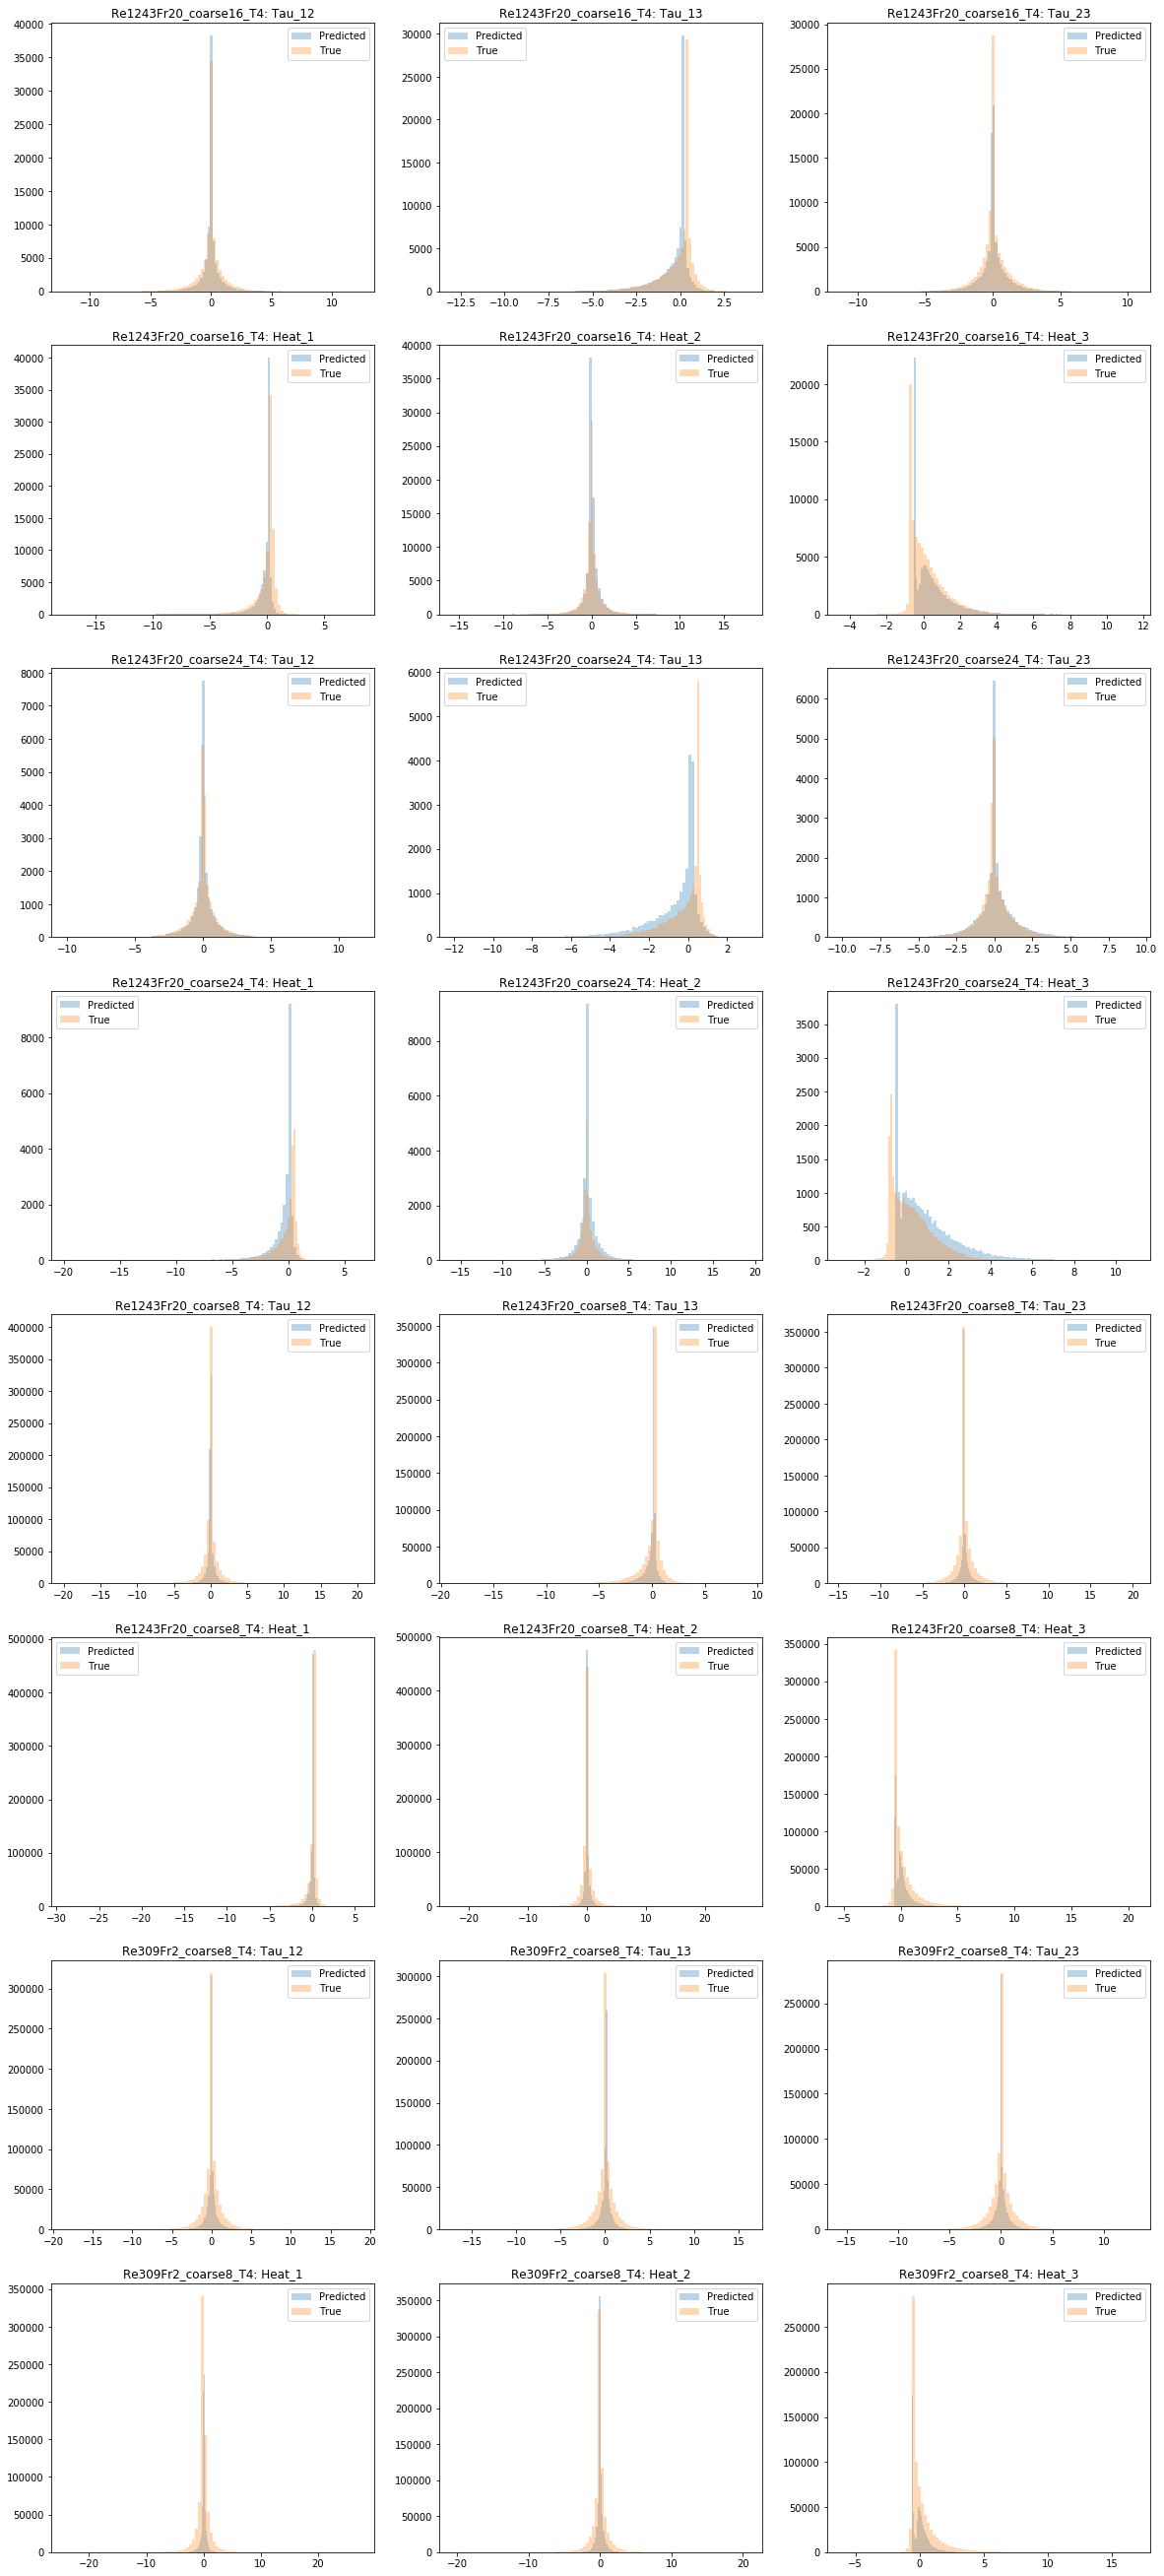

In [8]:
out_tau = [["Data Source", "Tau_12", "Tau_13", "Tau_23"]]
out_heat = [["Data Source", "Heat_1", "Heat_2", "Heat_3"]]
#os.mkdir("/home/pk2573/Taus")
count = 1
fig = plt.figure(figsize = (20, 192))
for m in [4]:
    print("\nTimestep:", str(m))
    for path in subdirs:
        check = False
        os.chdir(path)
        
        try:
            u = loadmat('u_F_xyz_T' + str(m) + '.mat')
            u = preprocess(scale(u[list(u.keys())[-1]]))
            v = loadmat('v_F_xyz_T' + str(m) + '.mat')
            v = preprocess(scale(v[list(v.keys())[-1]]))
            w = loadmat('w_F_xyz_T' + str(m) + '.mat')
            w = preprocess(scale(w[list(w.keys())[-1]]))
            tau_12 = loadmat('tau12_F_xyz_T' + str(m) + '.mat')
            tau_12 = preprocess(scale(tau_12[list(tau_12.keys())[-1]]))
            tau_13 = loadmat('tau13_F_xyz_T' + str(m) + '.mat')
            tau_13 = preprocess(scale(tau_13[list(tau_13.keys())[-1]]))
            tau_23 = loadmat('tau23_F_xyz_T' + str(m) + '.mat')
            tau_23 = preprocess(scale(tau_23[list(tau_23.keys())[-1]]))
            y_tau_12 = []
            y_tau_13 = []
            y_tau_23 = []

            if "Heat1_F_xyz_T1.mat" in os.listdir(path):
                heat_1 = loadmat('Heat1_F_xyz_T' + str(m) + '.mat')
                heat_1 = preprocess(scale(heat_1[list(heat_1.keys())[-1]]))
                heat_2 = loadmat('Heat2_F_xyz_T' + str(m) + '.mat')
                heat_2 = preprocess(scale(heat_2[list(heat_2.keys())[-1]]))
                heat_3 = loadmat('Heat3_F_xyz_T' + str(m) + '.mat')
                heat_3 = preprocess(scale(heat_3[list(heat_3.keys())[-1]]))
                y_heat_1 = []
                y_heat_2 = []
                y_heat_3 = []
                check = True

            print("Running " + path.split("/")[-2] + "_" + path.split("/")[-1])

            x = np.array([u, v, w])
            x = np.transpose(x, [1, 2, 3, 0])
            x = np.pad(x, ((3,3), (3,3), (3,3), (0,0)), 'constant', constant_values = 0)

            del u
            del v
            del w
            gc.collect()

            sample = []
            size = 3

            for i in range(size, x.shape[0] - size):
                for j in range(size, x.shape[1] - size):
                    for k in range(size, x.shape[2] - size):
                        sample.append(x[i - size: i + size + 1, j - size: j + size + 1, k - size: k + size + 1, :])
                        y_tau_12.append(tau_12[i - size][j - size][k - size])
                        y_tau_13.append(tau_13[i - size][j - size][k - size])
                        y_tau_23.append(tau_23[i - size][j - size][k - size])
                        if check:
                            y_heat_1.append(heat_1[i - size][j - size][k - size])
                            y_heat_2.append(heat_2[i - size][j - size][k - size])
                            y_heat_3.append(heat_3[i - size][j - size][k - size])


            x = np.array(sample)

            tau_12 = np.array(y_tau_12)
            tau_13 = np.array(y_tau_13)
            tau_23 = np.array(y_tau_23)

            if check:
                heat_1 = np.array(y_heat_1)
                heat_2 = np.array(y_heat_2)
                heat_3 = np.array(y_heat_3)

            if check:
                y_true = [tau_12, tau_13, tau_23, heat_1, heat_2, heat_3]
                del heat_1
                del heat_2
                del heat_3
            else:
                y_true = [tau_12, tau_13, tau_23]

            del sample
            del tau_12
            del tau_13
            del tau_23
            gc.collect()

            if check:
                taus = ["Tau_12", "Tau_13", "Tau_23", "Heat_1", "Heat_2", "Heat_3"]
            else:
                taus = ["Tau_12", "Tau_13", "Tau_23"]
            corrs = []

            if check:
                y_pred = model_base.predict(x)
            else:
                y_pred = model_base.predict(x)[:3]

            for j in range(len(y_pred)):
                corrs.append(np.corrcoef(y_pred[j].flatten(), y_true[j])[0, 1])

                fig.add_subplot((len(subdirs) + 4) * 2, 3, count)
                n_bins = 100
                plt.hist(y_pred[j].flatten(), bins = n_bins, alpha = 0.3, label = "Predicted")
                plt.hist(y_true[j], bins = n_bins, alpha = 0.3, label = "True")
                plt.title(path.split("/")[-2] + "_" + path.split("/")[-1] + str("_T" + str(m)) + ": " + taus[j])
                plt.legend()
                plt.show

                #os.chdir("/home/pk2573/Taus")
                #savemat(str(path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m) + "_" + taus[j]), {'tau': y_pred[i].flatten()})

                count += 1

            out_tau.append([path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m), str(np.round(corrs[0], 4)), str(np.round(corrs[1], 4)), str(np.round(corrs[2], 4))])
            if check:
                out_heat.append([path.split("/")[-2] + "_" + path.split("/")[-1] + "_T" + str(m), str(np.round(corrs[3], 4)), str(np.round(corrs[4], 4)), str(np.round(corrs[5], 4))])

            del x
            del y_pred
            del y_true
            del taus
            gc.collect()

        except:
            pass
        
    out_tau.append(["", "", "", ""])
    if check:
        out_heat.append(["", "", "", ""])

In [9]:
display(HTML(tabulate.tabulate(out_tau, tablefmt = 'html')))

Data Source,Tau_12,Tau_13,Tau_23
Re1243Fr20_coarse16_T4,0.7514,0.8373,0.8053
Re1243Fr20_coarse24_T4,0.7038,0.8026,0.7641
Re1243Fr20_coarse8_T4,0.8045,0.8543,0.8369
Re309Fr2_coarse8_T4,0.7911,0.8412,0.8426
,,,


In [10]:
display(HTML(tabulate.tabulate(out_heat, tablefmt = 'html')))

Data Source,Heat_1,Heat_2,Heat_3
Re1243Fr20_coarse16_T4,0.7772,0.6483,0.8105
Re1243Fr20_coarse24_T4,0.6985,0.6138,0.7968
Re1243Fr20_coarse8_T4,0.8394,0.6562,0.7768
Re309Fr2_coarse8_T4,0.6245,0.6458,0.7587
